In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

# MT ATAC-seq data

In [98]:
%cd ~

/home/mingju


In [99]:
%cd ./PreprocessDB/promoter_table

/home/mingju/PreprocessDB/promoter_table


In [100]:
os.getcwd()

'/home/mingju/PreprocessDB/promoter_table'

In [2]:
MT_atac = pd.read_csv('/mnt/10T-backup-mingju/ifar/ATAC_seq/MT/atac_output/idr.optimal_peak.narrowPeak_w_header',sep='\t')

In [3]:
MT_atac

,Chr,Start,End,name,score,strand,signalValue,pValue,qValue,peak
0,chr1,629562,630131,.,1000,.,10.18118,5255.37842,5247.06348,139
1,chr1,629562,630131,.,1000,.,9.06746,4341.48682,4334.17773,321
2,chr1,633817,634262,.,1000,.,7.49633,3135.06812,3128.26001,119
3,chr1,633817,634262,.,1000,.,6.74865,2599.60767,2593.02832,305
4,chr17,22521226,22521666,.,1000,.,32.02649,2324.03174,2317.51929,132
...,...,...,...,...,...,...,...,...,...,...
151265,chr1,101174750,101175746,.,763,.,2.42782,3.35482,1.67457,572
151266,chr10,73076272,73077247,.,599,.,2.42782,3.35482,1.67457,65
151267,chr10,72637221,72638091,.,866,.,2.42782,3.35482,1.67457,710
151268,chr10,70007166,70007807,.,579,.,2.42782,3.35482,1.67457,586


In [4]:
MT_atac['index'] = MT_atac['Chr'] + ":" + MT_atac['Start'].astype(str) + "-" + MT_atac['End'].astype(str)

In [5]:
MT_atac['ATAC_MT'] = "ATAC-seq:" + MT_atac['Chr'] + ":" + MT_atac['Start'].astype(str) + "-" + MT_atac['End'].astype(str)

In [6]:
MT_atac

,Chr,Start,End,name,score,strand,signalValue,pValue,qValue,peak,index,ATAC_MT
0,chr1,629562,630131,.,1000,.,10.18118,5255.37842,5247.06348,139,chr1:629562-630131,ATAC-seq:chr1:629562-630131
1,chr1,629562,630131,.,1000,.,9.06746,4341.48682,4334.17773,321,chr1:629562-630131,ATAC-seq:chr1:629562-630131
2,chr1,633817,634262,.,1000,.,7.49633,3135.06812,3128.26001,119,chr1:633817-634262,ATAC-seq:chr1:633817-634262
3,chr1,633817,634262,.,1000,.,6.74865,2599.60767,2593.02832,305,chr1:633817-634262,ATAC-seq:chr1:633817-634262
4,chr17,22521226,22521666,.,1000,.,32.02649,2324.03174,2317.51929,132,chr17:22521226-22521666,ATAC-seq:chr17:22521226-22521666
...,...,...,...,...,...,...,...,...,...,...,...,...
151265,chr1,101174750,101175746,.,763,.,2.42782,3.35482,1.67457,572,chr1:101174750-101175746,ATAC-seq:chr1:101174750-101175746
151266,chr10,73076272,73077247,.,599,.,2.42782,3.35482,1.67457,65,chr10:73076272-73077247,ATAC-seq:chr10:73076272-73077247
151267,chr10,72637221,72638091,.,866,.,2.42782,3.35482,1.67457,710,chr10:72637221-72638091,ATAC-seq:chr10:72637221-72638091
151268,chr10,70007166,70007807,.,579,.,2.42782,3.35482,1.67457,586,chr10:70007166-70007807,ATAC-seq:chr10:70007166-70007807


In [7]:
MT_atac_uniq = MT_atac.drop_duplicates(subset="index", keep='first')

In [8]:
MT_atac_uniq

,Chr,Start,End,name,score,strand,signalValue,pValue,qValue,peak,index,ATAC_MT
0,chr1,629562,630131,.,1000,.,10.18118,5255.37842,5247.06348,139,chr1:629562-630131,ATAC-seq:chr1:629562-630131
2,chr1,633817,634262,.,1000,.,7.49633,3135.06812,3128.26001,119,chr1:633817-634262,ATAC-seq:chr1:633817-634262
4,chr17,22521226,22521666,.,1000,.,32.02649,2324.03174,2317.51929,132,chr17:22521226-22521666,ATAC-seq:chr17:22521226-22521666
6,chr8,109333452,109334794,.,1000,.,15.83920,633.10614,626.95770,851,chr8:109333452-109334794,ATAC-seq:chr8:109333452-109334794
7,chr1,169893202,169894709,.,1000,.,17.79785,621.90320,615.77106,778,chr1:169893202-169894709,ATAC-seq:chr1:169893202-169894709
...,...,...,...,...,...,...,...,...,...,...,...,...
150395,chr2,221518222,221518503,.,1000,.,2.01126,3.46056,1.77423,198,chr2:221518222-221518503,ATAC-seq:chr2:221518222-221518503
150671,chr1,177741234,177741384,.,603,.,2.15866,3.42075,1.73678,73,chr1:177741234-177741384,ATAC-seq:chr1:177741234-177741384
150742,chr11,108958462,108958678,.,741,.,2.33577,3.40943,1.72609,210,chr11:108958462-108958678,ATAC-seq:chr11:108958462-108958678
150764,chr11,64688141,64688293,.,1000,.,1.79671,3.40386,1.72077,69,chr11:64688141-64688293,ATAC-seq:chr11:64688141-64688293


# MT DNase

In [81]:
MT_DNase = pd.read_csv('/mnt/10T-backup-mingju/ifar/DNase_seq/myotube/ENCFF222PWD.bed',sep='\t')

In [10]:
MT_DNase

,Chr,Start,End,name,score,strand,signalValue,pValue,qValue,peak
0,chr1,181415,181565,.,0,.,30.0,-1,-1,75
1,chr1,267990,268140,.,0,.,22.0,-1,-1,75
2,chr1,629870,630020,.,0,.,11484.0,-1,-1,75
3,chr1,630598,630748,.,0,.,34.0,-1,-1,75
4,chr1,633528,633678,.,0,.,12252.0,-1,-1,75
...,...,...,...,...,...,...,...,...,...,...
87053,chrY,26320155,26320305,.,0,.,22.0,-1,-1,75
87054,chrY,26359975,26360125,.,0,.,20.0,-1,-1,75
87055,chrY,56727995,56728145,.,0,.,15.0,-1,-1,75
87056,chrY,56734800,56734950,.,0,.,135.0,-1,-1,75


In [11]:
MT_DNase['index'] = MT_DNase['Chr'] + ":" + MT_DNase['Start'].astype(str) + "-" + MT_DNase['End'].astype(str)

In [12]:
MT_DNase['DNase_MT'] = "DNase-seq:" + MT_DNase['Chr'] + ":" + MT_DNase['Start'].astype(str) + "-" + MT_DNase['End'].astype(str)

In [13]:
MT_DNase

,Chr,Start,End,name,score,strand,signalValue,pValue,qValue,peak,index,DNase_MT
0,chr1,181415,181565,.,0,.,30.0,-1,-1,75,chr1:181415-181565,DNase-seq:chr1:181415-181565
1,chr1,267990,268140,.,0,.,22.0,-1,-1,75,chr1:267990-268140,DNase-seq:chr1:267990-268140
2,chr1,629870,630020,.,0,.,11484.0,-1,-1,75,chr1:629870-630020,DNase-seq:chr1:629870-630020
3,chr1,630598,630748,.,0,.,34.0,-1,-1,75,chr1:630598-630748,DNase-seq:chr1:630598-630748
4,chr1,633528,633678,.,0,.,12252.0,-1,-1,75,chr1:633528-633678,DNase-seq:chr1:633528-633678
...,...,...,...,...,...,...,...,...,...,...,...,...
87053,chrY,26320155,26320305,.,0,.,22.0,-1,-1,75,chrY:26320155-26320305,DNase-seq:chrY:26320155-26320305
87054,chrY,26359975,26360125,.,0,.,20.0,-1,-1,75,chrY:26359975-26360125,DNase-seq:chrY:26359975-26360125
87055,chrY,56727995,56728145,.,0,.,15.0,-1,-1,75,chrY:56727995-56728145,DNase-seq:chrY:56727995-56728145
87056,chrY,56734800,56734950,.,0,.,135.0,-1,-1,75,chrY:56734800-56734950,DNase-seq:chrY:56734800-56734950


In [14]:
MT_DNase_uniq = MT_DNase.drop_duplicates(subset="index", keep='first')

In [15]:
MT_DNase_uniq

,Chr,Start,End,name,score,strand,signalValue,pValue,qValue,peak,index,DNase_MT
0,chr1,181415,181565,.,0,.,30.0,-1,-1,75,chr1:181415-181565,DNase-seq:chr1:181415-181565
1,chr1,267990,268140,.,0,.,22.0,-1,-1,75,chr1:267990-268140,DNase-seq:chr1:267990-268140
2,chr1,629870,630020,.,0,.,11484.0,-1,-1,75,chr1:629870-630020,DNase-seq:chr1:629870-630020
3,chr1,630598,630748,.,0,.,34.0,-1,-1,75,chr1:630598-630748,DNase-seq:chr1:630598-630748
4,chr1,633528,633678,.,0,.,12252.0,-1,-1,75,chr1:633528-633678,DNase-seq:chr1:633528-633678
...,...,...,...,...,...,...,...,...,...,...,...,...
87053,chrY,26320155,26320305,.,0,.,22.0,-1,-1,75,chrY:26320155-26320305,DNase-seq:chrY:26320155-26320305
87054,chrY,26359975,26360125,.,0,.,20.0,-1,-1,75,chrY:26359975-26360125,DNase-seq:chrY:26359975-26360125
87055,chrY,56727995,56728145,.,0,.,15.0,-1,-1,75,chrY:56727995-56728145,DNase-seq:chrY:56727995-56728145
87056,chrY,56734800,56734950,.,0,.,135.0,-1,-1,75,chrY:56734800-56734950,DNase-seq:chrY:56734800-56734950


In [15]:
merge_atac_dnase = pd.merge(MT_atac_uniq[['index','Chr','Start','End','ATAC_MT']], MT_DNase_uniq[['index','DNase_MT']], on='index', how='outer')

In [16]:
merge_atac_dnase

,index,Chr,Start,End,ATAC_MT,DNase_MT
0,chr10:100006395-100006545,NaN,NaN,NaN,NaN,DNase-seq:chr10:100006395-100006545
1,chr10:100009208-100010573,chr10,100009208.0,100010573.0,ATAC-seq:chr10:100009208-100010573,NaN
2,chr10:100025224-100026486,chr10,100025224.0,100026486.0,ATAC-seq:chr10:100025224-100026486,NaN
3,chr10:100043466-100044717,chr10,100043466.0,100044717.0,ATAC-seq:chr10:100043466-100044717,NaN
4,chr10:100043915-100044065,NaN,NaN,NaN,NaN,DNase-seq:chr10:100043915-100044065
...,...,...,...,...,...,...
139646,chrY:9028075-9028225,NaN,NaN,NaN,NaN,DNase-seq:chrY:9028075-9028225
139647,chrY:9160678-9161527,chrY,9160678.0,9161527.0,ATAC-seq:chrY:9160678-9161527,NaN
139648,chrY:9177772-9177922,NaN,NaN,NaN,NaN,DNase-seq:chrY:9177772-9177922
139649,chrY:9259495-9259645,NaN,NaN,NaN,NaN,DNase-seq:chrY:9259495-9259645


In [17]:
merge_atac_dnase["OpenChromatin"] = merge_atac_dnase.apply(
    lambda row: f"{row['ATAC_MT']};{row['DNase_MT']}" if pd.notna(row['ATAC_MT']) and pd.notna(row['DNase_MT']) and row['DNase_MT'] != ""
                else row['ATAC_MT'] if pd.notna(row['ATAC_MT'])
                else row['DNase_MT'] if pd.notna(row['DNase_MT']) and row['DNase_MT'] != ""
                else "", 
    axis=1
)

In [18]:
merge_atac_dnase

,index,Chr,Start,End,ATAC_MT,DNase_MT,OpenChromatin
0,chr10:100006395-100006545,NaN,NaN,NaN,NaN,DNase-seq:chr10:100006395-100006545,DNase-seq:chr10:100006395-100006545
1,chr10:100009208-100010573,chr10,100009208.0,100010573.0,ATAC-seq:chr10:100009208-100010573,NaN,ATAC-seq:chr10:100009208-100010573
2,chr10:100025224-100026486,chr10,100025224.0,100026486.0,ATAC-seq:chr10:100025224-100026486,NaN,ATAC-seq:chr10:100025224-100026486
3,chr10:100043466-100044717,chr10,100043466.0,100044717.0,ATAC-seq:chr10:100043466-100044717,NaN,ATAC-seq:chr10:100043466-100044717
4,chr10:100043915-100044065,NaN,NaN,NaN,NaN,DNase-seq:chr10:100043915-100044065,DNase-seq:chr10:100043915-100044065
...,...,...,...,...,...,...,...
139646,chrY:9028075-9028225,NaN,NaN,NaN,NaN,DNase-seq:chrY:9028075-9028225,DNase-seq:chrY:9028075-9028225
139647,chrY:9160678-9161527,chrY,9160678.0,9161527.0,ATAC-seq:chrY:9160678-9161527,NaN,ATAC-seq:chrY:9160678-9161527
139648,chrY:9177772-9177922,NaN,NaN,NaN,NaN,DNase-seq:chrY:9177772-9177922,DNase-seq:chrY:9177772-9177922
139649,chrY:9259495-9259645,NaN,NaN,NaN,NaN,DNase-seq:chrY:9259495-9259645,DNase-seq:chrY:9259495-9259645


In [19]:
def parse_index(index_str):
    if pd.isna(index_str) or index_str == "NaN":
        return pd.NA, pd.NA, pd.NA
    chr_part, range_part = index_str.split(":")
    chr_value = chr_part.replace("chr", "")
    start, end = range_part.split("-")
    return chr_value, pd.to_numeric(start), pd.to_numeric(end)

In [20]:
merge_atac_dnase[['Chr', 'Start', 'End']] = merge_atac_dnase['index'].apply(lambda x: pd.Series(parse_index(x)))

In [21]:
merge_atac_dnase

,index,Chr,Start,End,ATAC_MT,DNase_MT,OpenChromatin
0,chr10:100006395-100006545,10,100006395,100006545,NaN,DNase-seq:chr10:100006395-100006545,DNase-seq:chr10:100006395-100006545
1,chr10:100009208-100010573,10,100009208,100010573,ATAC-seq:chr10:100009208-100010573,NaN,ATAC-seq:chr10:100009208-100010573
2,chr10:100025224-100026486,10,100025224,100026486,ATAC-seq:chr10:100025224-100026486,NaN,ATAC-seq:chr10:100025224-100026486
3,chr10:100043466-100044717,10,100043466,100044717,ATAC-seq:chr10:100043466-100044717,NaN,ATAC-seq:chr10:100043466-100044717
4,chr10:100043915-100044065,10,100043915,100044065,NaN,DNase-seq:chr10:100043915-100044065,DNase-seq:chr10:100043915-100044065
...,...,...,...,...,...,...,...
139646,chrY:9028075-9028225,Y,9028075,9028225,NaN,DNase-seq:chrY:9028075-9028225,DNase-seq:chrY:9028075-9028225
139647,chrY:9160678-9161527,Y,9160678,9161527,ATAC-seq:chrY:9160678-9161527,NaN,ATAC-seq:chrY:9160678-9161527
139648,chrY:9177772-9177922,Y,9177772,9177922,NaN,DNase-seq:chrY:9177772-9177922,DNase-seq:chrY:9177772-9177922
139649,chrY:9259495-9259645,Y,9259495,9259645,NaN,DNase-seq:chrY:9259495-9259645,DNase-seq:chrY:9259495-9259645


In [22]:
# Define the chromosome order: 1 to 22, X, Y
chr_order = [str(i) for i in range(1, 23)] + ["X", "Y"]

# Convert Chr to categorical with the specified order
merge_atac_dnase["Chr"] = pd.Categorical(merge_atac_dnase["Chr"], categories=chr_order, ordered=True)

# Sort by Chr and Start
merge_atac_dnase_sorted = merge_atac_dnase.sort_values(by=["Chr", "Start"])

In [23]:
merge_atac_dnase_sorted.reset_index(drop=True)

,index,Chr,Start,End,ATAC_MT,DNase_MT,OpenChromatin
0,chr1:181415-181565,1,181415,181565,NaN,DNase-seq:chr1:181415-181565,DNase-seq:chr1:181415-181565
1,chr1:267990-268140,1,267990,268140,NaN,DNase-seq:chr1:267990-268140,DNase-seq:chr1:267990-268140
2,chr1:629562-630131,1,629562,630131,ATAC-seq:chr1:629562-630131,NaN,ATAC-seq:chr1:629562-630131
3,chr1:629870-630020,1,629870,630020,NaN,DNase-seq:chr1:629870-630020,DNase-seq:chr1:629870-630020
4,chr1:630598-630748,1,630598,630748,NaN,DNase-seq:chr1:630598-630748,DNase-seq:chr1:630598-630748
...,...,...,...,...,...,...,...
139646,chrY:26359975-26360125,Y,26359975,26360125,NaN,DNase-seq:chrY:26359975-26360125,DNase-seq:chrY:26359975-26360125
139647,chrY:26365821-26366654,Y,26365821,26366654,ATAC-seq:chrY:26365821-26366654,NaN,ATAC-seq:chrY:26365821-26366654
139648,chrY:56727995-56728145,Y,56727995,56728145,NaN,DNase-seq:chrY:56727995-56728145,DNase-seq:chrY:56727995-56728145
139649,chrY:56734800-56734950,Y,56734800,56734950,NaN,DNase-seq:chrY:56734800-56734950,DNase-seq:chrY:56734800-56734950


In [24]:
merge_atac_dnase_sorted.head(100)

,index,Chr,Start,End,ATAC_MT,DNase_MT,OpenChromatin
54899,chr1:181415-181565,1,181415,181565,NaN,DNase-seq:chr1:181415-181565,DNase-seq:chr1:181415-181565
59412,chr1:267990-268140,1,267990,268140,NaN,DNase-seq:chr1:267990-268140,DNase-seq:chr1:267990-268140
62036,chr1:629562-630131,1,629562,630131,ATAC-seq:chr1:629562-630131,NaN,ATAC-seq:chr1:629562-630131
62038,chr1:629870-630020,1,629870,630020,NaN,DNase-seq:chr1:629870-630020,DNase-seq:chr1:629870-630020
62041,chr1:630598-630748,1,630598,630748,NaN,DNase-seq:chr1:630598-630748,DNase-seq:chr1:630598-630748
...,...,...,...,...,...,...,...
52686,chr1:1511955-1512105,1,1511955,1512105,NaN,DNase-seq:chr1:1511955-1512105,DNase-seq:chr1:1511955-1512105
52920,chr1:1540281-1541159,1,1540281,1541159,ATAC-seq:chr1:1540281-1541159,NaN,ATAC-seq:chr1:1540281-1541159
53046,chr1:1551073-1551223,1,1551073,1551223,NaN,DNase-seq:chr1:1551073-1551223,DNase-seq:chr1:1551073-1551223
53100,chr1:1554491-1555433,1,1554491,1555433,ATAC-seq:chr1:1554491-1555433,NaN,ATAC-seq:chr1:1554491-1555433


In [25]:
merge_atac_dnase_sorted[merge_atac_dnase_sorted['ATAC_MT'].notna()&merge_atac_dnase_sorted['DNase_MT'].notna()]

,index,Chr,Start,End,ATAC_MT,DNase_MT,OpenChromatin


In [26]:
merge_atac_dnase_sorted

,index,Chr,Start,End,ATAC_MT,DNase_MT,OpenChromatin
54899,chr1:181415-181565,1,181415,181565,NaN,DNase-seq:chr1:181415-181565,DNase-seq:chr1:181415-181565
59412,chr1:267990-268140,1,267990,268140,NaN,DNase-seq:chr1:267990-268140,DNase-seq:chr1:267990-268140
62036,chr1:629562-630131,1,629562,630131,ATAC-seq:chr1:629562-630131,NaN,ATAC-seq:chr1:629562-630131
62038,chr1:629870-630020,1,629870,630020,NaN,DNase-seq:chr1:629870-630020,DNase-seq:chr1:629870-630020
62041,chr1:630598-630748,1,630598,630748,NaN,DNase-seq:chr1:630598-630748,DNase-seq:chr1:630598-630748
...,...,...,...,...,...,...,...
139576,chrY:26359975-26360125,Y,26359975,26360125,NaN,DNase-seq:chrY:26359975-26360125,DNase-seq:chrY:26359975-26360125
139577,chrY:26365821-26366654,Y,26365821,26366654,ATAC-seq:chrY:26365821-26366654,NaN,ATAC-seq:chrY:26365821-26366654
139588,chrY:56727995-56728145,Y,56727995,56728145,NaN,DNase-seq:chrY:56727995-56728145,DNase-seq:chrY:56727995-56728145
139589,chrY:56734800-56734950,Y,56734800,56734950,NaN,DNase-seq:chrY:56734800-56734950,DNase-seq:chrY:56734800-56734950


In [27]:
MT_merge_atac_dnase_sorted_bed = merge_atac_dnase_sorted[["Chr","Start","End","OpenChromatin"]]

In [28]:
MT_merge_atac_dnase_sorted_bed

,Chr,Start,End,OpenChromatin
54899,1,181415,181565,DNase-seq:chr1:181415-181565
59412,1,267990,268140,DNase-seq:chr1:267990-268140
62036,1,629562,630131,ATAC-seq:chr1:629562-630131
62038,1,629870,630020,DNase-seq:chr1:629870-630020
62041,1,630598,630748,DNase-seq:chr1:630598-630748
...,...,...,...,...
139576,Y,26359975,26360125,DNase-seq:chrY:26359975-26360125
139577,Y,26365821,26366654,ATAC-seq:chrY:26365821-26366654
139588,Y,56727995,56728145,DNase-seq:chrY:56727995-56728145
139589,Y,56734800,56734950,DNase-seq:chrY:56734800-56734950


In [29]:
MT_merge_atac_dnase_sorted_bed['Chr'] = 'chr' + MT_merge_atac_dnase_sorted_bed['Chr'].astype(str)

/tmp/ipykernel_4105959/3441541605.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MT_merge_atac_dnase_sorted_bed['Chr'] = 'chr' + MT_merge_atac_dnase_sorted_bed['Chr'].astype(str)


In [30]:
MT_merge_atac_dnase_sorted_bed

,Chr,Start,End,OpenChromatin
54899,chr1,181415,181565,DNase-seq:chr1:181415-181565
59412,chr1,267990,268140,DNase-seq:chr1:267990-268140
62036,chr1,629562,630131,ATAC-seq:chr1:629562-630131
62038,chr1,629870,630020,DNase-seq:chr1:629870-630020
62041,chr1,630598,630748,DNase-seq:chr1:630598-630748
...,...,...,...,...
139576,chrY,26359975,26360125,DNase-seq:chrY:26359975-26360125
139577,chrY,26365821,26366654,ATAC-seq:chrY:26365821-26366654
139588,chrY,56727995,56728145,DNase-seq:chrY:56727995-56728145
139589,chrY,56734800,56734950,DNase-seq:chrY:56734800-56734950


In [31]:
MT_merge_atac_dnase_sorted_bed.to_csv('/mnt/10T-backup-mingju/ifar/databases/hg38/RegionBased/openChromatin/myotube/hg38_OpenChromatin_MT.bed',sep='\t',header=False,index=False)

### promoter table overlap with openchromatin 

In [101]:
!bedtools intersect -a /mnt/10T-backup-mingju/ifar/databases/hg38/RegionBased/promoter/promoter_regions_pcg_250bp_sorted.bed -b /mnt/10T-backup-mingju/ifar/databases/hg38/RegionBased/openChromatin/myotube/hg38_OpenChromatin_MT.bed -wao > /mnt/10T-backup-mingju/ifar/databases/hg38/RegionBased/promoter/MT/promoter_like_regions_MT_openchromatin.bed

### remove duplicated rows

In [102]:
cols = ["Chrom","start","end","Transcript","TSS","Gene","strand","transcript_support_level",'chr_open','start_open','end_open','openChromatin','overlap']

In [103]:
promoter_like_open = pd.read_csv('/mnt/10T-backup-mingju/ifar/databases/hg38/RegionBased/promoter/MT/promoter_like_regions_MT_openchromatin.bed',
                                 sep='\t',
                                 header=None,
                                 names=cols)

In [104]:
promoter_like_open

,Chrom,start,end,Transcript,TSS,Gene,strand,transcript_support_level,chr_open,start_open,end_open,openChromatin,overlap
0,chr1,65169,65669,ENST00000641515,65419,OR4F5,+,NaN,.,-1,-1,.,0
1,chr1,451428,451928,ENST00000426406,451678,OR4F29,-,NaN,.,-1,-1,.,0
2,chr1,686404,686904,ENST00000332831,686654,OR4F16,-,NaN,.,-1,-1,.,0
3,chr1,923673,924173,ENST00000616016,923923,SAMD11,+,5.0,chr1,923647,924887,ATAC-seq:chr1:923647-924887,500
4,chr1,923673,924173,ENST00000618323,923923,SAMD11,+,5.0,chr1,923647,924887,ATAC-seq:chr1:923647-924887,500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
241883,chrY,57208269,57208769,ENST00000711281,57208519,WASH6P,+,5.0,.,-1,-1,.,0
241884,chrY,57209056,57209556,ENST00000711282,57209306,WASH6P,+,1.0,.,-1,-1,.,0
241885,chrY,57209637,57210137,ENST00000711283,57209887,WASH6P,+,2.0,.,-1,-1,.,0
241886,chrY,57210094,57210594,ENST00000711284,57210344,WASH6P,+,1.0,.,-1,-1,.,0


In [105]:
promoter_like_open.head(50)

,Chrom,start,end,Transcript,TSS,Gene,strand,transcript_support_level,chr_open,start_open,end_open,openChromatin,overlap
0,chr1,65169,65669,ENST00000641515,65419,OR4F5,+,NaN,.,-1,-1,.,0
1,chr1,451428,451928,ENST00000426406,451678,OR4F29,-,NaN,.,-1,-1,.,0
2,chr1,686404,686904,ENST00000332831,686654,OR4F16,-,NaN,.,-1,-1,.,0
3,chr1,923673,924173,ENST00000616016,923923,SAMD11,+,5.0,chr1,923647,924887,ATAC-seq:chr1:923647-924887,500
4,chr1,923673,924173,ENST00000618323,923923,SAMD11,+,5.0,chr1,923647,924887,ATAC-seq:chr1:923647-924887,500
5,chr1,924900,925400,ENST00000437963,925150,SAMD11,+,5.0,.,-1,-1,.,0
6,chr1,925481,925981,ENST00000342066,925731,SAMD11,+,5.0,.,-1,-1,.,0
7,chr1,925692,926192,ENST00000616125,925942,SAMD11,+,5.0,.,-1,-1,.,0
8,chr1,925692,926192,ENST00000617307,925942,SAMD11,+,5.0,.,-1,-1,.,0
9,chr1,925692,926192,ENST00000618181,925942,SAMD11,+,5.0,.,-1,-1,.,0


In [106]:
promoter_like_open.drop_duplicates(inplace=True)

In [107]:
promoter_like_open

,Chrom,start,end,Transcript,TSS,Gene,strand,transcript_support_level,chr_open,start_open,end_open,openChromatin,overlap
0,chr1,65169,65669,ENST00000641515,65419,OR4F5,+,NaN,.,-1,-1,.,0
1,chr1,451428,451928,ENST00000426406,451678,OR4F29,-,NaN,.,-1,-1,.,0
2,chr1,686404,686904,ENST00000332831,686654,OR4F16,-,NaN,.,-1,-1,.,0
3,chr1,923673,924173,ENST00000616016,923923,SAMD11,+,5.0,chr1,923647,924887,ATAC-seq:chr1:923647-924887,500
4,chr1,923673,924173,ENST00000618323,923923,SAMD11,+,5.0,chr1,923647,924887,ATAC-seq:chr1:923647-924887,500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
241883,chrY,57208269,57208769,ENST00000711281,57208519,WASH6P,+,5.0,.,-1,-1,.,0
241884,chrY,57209056,57209556,ENST00000711282,57209306,WASH6P,+,1.0,.,-1,-1,.,0
241885,chrY,57209637,57210137,ENST00000711283,57209887,WASH6P,+,2.0,.,-1,-1,.,0
241886,chrY,57210094,57210594,ENST00000711284,57210344,WASH6P,+,1.0,.,-1,-1,.,0


In [108]:
promoter_like_open.head(50)

,Chrom,start,end,Transcript,TSS,Gene,strand,transcript_support_level,chr_open,start_open,end_open,openChromatin,overlap
0,chr1,65169,65669,ENST00000641515,65419,OR4F5,+,NaN,.,-1,-1,.,0
1,chr1,451428,451928,ENST00000426406,451678,OR4F29,-,NaN,.,-1,-1,.,0
2,chr1,686404,686904,ENST00000332831,686654,OR4F16,-,NaN,.,-1,-1,.,0
3,chr1,923673,924173,ENST00000616016,923923,SAMD11,+,5.0,chr1,923647,924887,ATAC-seq:chr1:923647-924887,500
4,chr1,923673,924173,ENST00000618323,923923,SAMD11,+,5.0,chr1,923647,924887,ATAC-seq:chr1:923647-924887,500
5,chr1,924900,925400,ENST00000437963,925150,SAMD11,+,5.0,.,-1,-1,.,0
6,chr1,925481,925981,ENST00000342066,925731,SAMD11,+,5.0,.,-1,-1,.,0
7,chr1,925692,926192,ENST00000616125,925942,SAMD11,+,5.0,.,-1,-1,.,0
8,chr1,925692,926192,ENST00000617307,925942,SAMD11,+,5.0,.,-1,-1,.,0
9,chr1,925692,926192,ENST00000618181,925942,SAMD11,+,5.0,.,-1,-1,.,0


In [109]:
# Define the columns to group by (Chrom to Type)
group_cols = promoter_like_open.columns[:8]  # Adjust if needed
print(group_cols)

Index(['Chrom', 'start', 'end', 'Transcript', 'TSS', 'Gene', 'strand',
       'transcript_support_level'],
      dtype='object')


In [110]:
# Group by Chrom to Type, and aggregate openChromatin by joining with ";"
collapsed_df = promoter_like_open.groupby(list(group_cols), dropna=False)['openChromatin'] \
    .agg(lambda x: ';'.join(sorted(set(x.dropna())))) \
    .reset_index()


In [111]:
collapsed_df

,Chrom,start,end,Transcript,TSS,Gene,strand,transcript_support_level,openChromatin
0,chr1,65169,65669,ENST00000641515,65419,OR4F5,+,NaN,.
1,chr1,451428,451928,ENST00000426406,451678,OR4F29,-,NaN,.
2,chr1,686404,686904,ENST00000332831,686654,OR4F16,-,NaN,.
3,chr1,923673,924173,ENST00000616016,923923,SAMD11,+,5.0,ATAC-seq:chr1:923647-924887
4,chr1,923673,924173,ENST00000618323,923923,SAMD11,+,5.0,ATAC-seq:chr1:923647-924887
...,...,...,...,...,...,...,...,...,...
170552,chrY,57208269,57208769,ENST00000711281,57208519,WASH6P,+,5.0,.
170553,chrY,57209056,57209556,ENST00000711282,57209306,WASH6P,+,1.0,.
170554,chrY,57209637,57210137,ENST00000711283,57209887,WASH6P,+,2.0,.
170555,chrY,57210094,57210594,ENST00000711284,57210344,WASH6P,+,1.0,.


In [112]:
collapsed_df.head(50)

,Chrom,start,end,Transcript,TSS,Gene,strand,transcript_support_level,openChromatin
0,chr1,65169,65669,ENST00000641515,65419,OR4F5,+,NaN,.
1,chr1,451428,451928,ENST00000426406,451678,OR4F29,-,NaN,.
2,chr1,686404,686904,ENST00000332831,686654,OR4F16,-,NaN,.
3,chr1,923673,924173,ENST00000616016,923923,SAMD11,+,5.0,ATAC-seq:chr1:923647-924887
4,chr1,923673,924173,ENST00000618323,923923,SAMD11,+,5.0,ATAC-seq:chr1:923647-924887
5,chr1,924900,925400,ENST00000437963,925150,SAMD11,+,5.0,.
6,chr1,925481,925981,ENST00000342066,925731,SAMD11,+,5.0,.
7,chr1,925692,926192,ENST00000616125,925942,SAMD11,+,5.0,.
8,chr1,925692,926192,ENST00000617307,925942,SAMD11,+,5.0,.
9,chr1,925692,926192,ENST00000618181,925942,SAMD11,+,5.0,.


In [113]:
collapsed_df.to_csv('/mnt/10T-backup-mingju/ifar/databases/hg38/RegionBased/promoter/MT/promoter_like_regions_MT_openchromatin.bed_uniq',sep='\t',header=False,index=False)

## promoter table overlap with chromHMM

In [45]:
cols = ["Chrom","start","end","ChromHMM_Myotube"]

In [46]:
MT_chromHMM = pd.read_csv('/mnt/10T-backup-mingju/ifar/databases/hg38/RegionBased/chromHMM_E121_25_myotube/hg38_chromHMM_E121_25.txt',
                          sep='\t',
                          header=None,
                          names=cols
                          )

In [47]:
MT_chromHMM

,Chrom,start,end,ChromHMM_Myotube
0,chr1,10000,10200,25_Quies
1,chr1,10200,10600,19_DNase
2,chr1,10600,96080,25_Quies
3,chr1,96276,96476,25_Quies
4,chr1,97276,177200,25_Quies
...,...,...,...,...
891173,chrX,155966935,155967135,19_DNase
891174,chrX,155967135,156030135,25_Quies
891175,chrX,156030135,156030735,19_DNase
891176,chrY,1086142,1086334,25_Quies


In [48]:
MT_chromHMM['ChromHMM_Myotube'] = MT_chromHMM['Chrom'] + ":" + MT_chromHMM['start'].astype('str') + ":" + MT_chromHMM['end'].astype('str') + ":" + MT_chromHMM['ChromHMM_Myotube']

In [49]:
MT_chromHMM

,Chrom,start,end,ChromHMM_Myotube
0,chr1,10000,10200,chr1:10000:10200:25_Quies
1,chr1,10200,10600,chr1:10200:10600:19_DNase
2,chr1,10600,96080,chr1:10600:96080:25_Quies
3,chr1,96276,96476,chr1:96276:96476:25_Quies
4,chr1,97276,177200,chr1:97276:177200:25_Quies
...,...,...,...,...
891173,chrX,155966935,155967135,chrX:155966935:155967135:19_DNase
891174,chrX,155967135,156030135,chrX:155967135:156030135:25_Quies
891175,chrX,156030135,156030735,chrX:156030135:156030735:19_DNase
891176,chrY,1086142,1086334,chrY:1086142:1086334:25_Quies


In [50]:
MT_chromHMM.to_csv('/mnt/10T-backup-mingju/ifar/databases/hg38/RegionBased/chromHMM_E121_25_myotube/hg38_chromHMM_myotube.bed',sep='\t',header=False,index=False)

In [114]:
!bedtools intersect -a /mnt/10T-backup-mingju/ifar/databases/hg38/RegionBased/promoter/MT/promoter_like_regions_MT_openchromatin.bed_uniq -b /mnt/10T-backup-mingju/ifar/databases/hg38/RegionBased/chromHMM_E121_25_myotube/hg38_chromHMM_myotube.bed -wao > /mnt/10T-backup-mingju/ifar/databases/hg38/RegionBased/promoter/MT/promoter_like_regions_MT_openchromatin_chromHMM.bed

In [115]:
cols = ["Chrom","start","end","Transcript","TSS","Gene","strand","transcript_support_level",'openChromatin','chr_HMM','start_HMM','end_HMM','chromHMM_myotube','overlap']

In [116]:
promoter_like_open = pd.read_csv('/mnt/10T-backup-mingju/ifar/databases/hg38/RegionBased/promoter/MT/promoter_like_regions_MT_openchromatin_chromHMM.bed',
                                 sep='\t',
                                 header=None,
                                 names=cols)

In [117]:
promoter_like_open

,Chrom,start,end,Transcript,TSS,Gene,strand,transcript_support_level,openChromatin,chr_HMM,start_HMM,end_HMM,chromHMM_myotube,overlap
0,chr1,65169,65669,ENST00000641515,65419,OR4F5,+,NaN,.,chr1,10600,96080,chr1:10600:96080:25_Quies,500
1,chr1,451428,451928,ENST00000426406,451678,OR4F29,-,NaN,.,chr1,348136,501536,chr1:348136:501536:25_Quies,500
2,chr1,686404,686904,ENST00000332831,686654,OR4F16,-,NaN,.,chr1,634820,733820,chr1:634820:733820:25_Quies,500
3,chr1,923673,924173,ENST00000616016,923923,SAMD11,+,5.0,ATAC-seq:chr1:923647-924887,chr1,923420,923820,chr1:923420:923820:2_PromU,147
4,chr1,923673,924173,ENST00000616016,923923,SAMD11,+,5.0,ATAC-seq:chr1:923647-924887,chr1,923820,924620,chr1:923820:924620:22_PromP,353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290239,chrY,57208269,57208769,ENST00000711281,57208519,WASH6P,+,5.0,.,.,-1,-1,.,0
290240,chrY,57209056,57209556,ENST00000711282,57209306,WASH6P,+,1.0,.,.,-1,-1,.,0
290241,chrY,57209637,57210137,ENST00000711283,57209887,WASH6P,+,2.0,.,.,-1,-1,.,0
290242,chrY,57210094,57210594,ENST00000711284,57210344,WASH6P,+,1.0,.,.,-1,-1,.,0


In [118]:
promoter_like_open.drop_duplicates(inplace=True)

In [119]:
promoter_like_open

,Chrom,start,end,Transcript,TSS,Gene,strand,transcript_support_level,openChromatin,chr_HMM,start_HMM,end_HMM,chromHMM_myotube,overlap
0,chr1,65169,65669,ENST00000641515,65419,OR4F5,+,NaN,.,chr1,10600,96080,chr1:10600:96080:25_Quies,500
1,chr1,451428,451928,ENST00000426406,451678,OR4F29,-,NaN,.,chr1,348136,501536,chr1:348136:501536:25_Quies,500
2,chr1,686404,686904,ENST00000332831,686654,OR4F16,-,NaN,.,chr1,634820,733820,chr1:634820:733820:25_Quies,500
3,chr1,923673,924173,ENST00000616016,923923,SAMD11,+,5.0,ATAC-seq:chr1:923647-924887,chr1,923420,923820,chr1:923420:923820:2_PromU,147
4,chr1,923673,924173,ENST00000616016,923923,SAMD11,+,5.0,ATAC-seq:chr1:923647-924887,chr1,923820,924620,chr1:923820:924620:22_PromP,353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290239,chrY,57208269,57208769,ENST00000711281,57208519,WASH6P,+,5.0,.,.,-1,-1,.,0
290240,chrY,57209056,57209556,ENST00000711282,57209306,WASH6P,+,1.0,.,.,-1,-1,.,0
290241,chrY,57209637,57210137,ENST00000711283,57209887,WASH6P,+,2.0,.,.,-1,-1,.,0
290242,chrY,57210094,57210594,ENST00000711284,57210344,WASH6P,+,1.0,.,.,-1,-1,.,0


In [120]:
# Define the columns to group by (Chrom to openChromatin)
group_cols = promoter_like_open.columns[:9]  # Adjust if needed
print(group_cols)

Index(['Chrom', 'start', 'end', 'Transcript', 'TSS', 'Gene', 'strand',
       'transcript_support_level', 'openChromatin'],
      dtype='object')


In [121]:
# Group by Chrom to Type, and aggregate openChromatin by joining with ";"
collapsed_df = promoter_like_open.groupby(list(group_cols), dropna=False)['chromHMM_myotube'] \
    .agg(lambda x: ';'.join(sorted(set(x.dropna())))) \
    .reset_index()


In [122]:
collapsed_df

,Chrom,start,end,Transcript,TSS,Gene,strand,transcript_support_level,openChromatin,chromHMM_myotube
0,chr1,65169,65669,ENST00000641515,65419,OR4F5,+,NaN,.,chr1:10600:96080:25_Quies
1,chr1,451428,451928,ENST00000426406,451678,OR4F29,-,NaN,.,chr1:348136:501536:25_Quies
2,chr1,686404,686904,ENST00000332831,686654,OR4F16,-,NaN,.,chr1:634820:733820:25_Quies
3,chr1,923673,924173,ENST00000616016,923923,SAMD11,+,5.0,ATAC-seq:chr1:923647-924887,chr1:923420:923820:2_PromU;chr1:923820:924620:...
4,chr1,923673,924173,ENST00000618323,923923,SAMD11,+,5.0,ATAC-seq:chr1:923647-924887,chr1:923420:923820:2_PromU;chr1:923820:924620:...
...,...,...,...,...,...,...,...,...,...,...
170552,chrY,57208269,57208769,ENST00000711281,57208519,WASH6P,+,5.0,.,.
170553,chrY,57209056,57209556,ENST00000711282,57209306,WASH6P,+,1.0,.,.
170554,chrY,57209637,57210137,ENST00000711283,57209887,WASH6P,+,2.0,.,.
170555,chrY,57210094,57210594,ENST00000711284,57210344,WASH6P,+,1.0,.,.


In [123]:
collapsed_df.head(50)

,Chrom,start,end,Transcript,TSS,Gene,strand,transcript_support_level,openChromatin,chromHMM_myotube
0,chr1,65169,65669,ENST00000641515,65419,OR4F5,+,NaN,.,chr1:10600:96080:25_Quies
1,chr1,451428,451928,ENST00000426406,451678,OR4F29,-,NaN,.,chr1:348136:501536:25_Quies
2,chr1,686404,686904,ENST00000332831,686654,OR4F16,-,NaN,.,chr1:634820:733820:25_Quies
3,chr1,923673,924173,ENST00000616016,923923,SAMD11,+,5.0,ATAC-seq:chr1:923647-924887,chr1:923420:923820:2_PromU;chr1:923820:924620:...
4,chr1,923673,924173,ENST00000618323,923923,SAMD11,+,5.0,ATAC-seq:chr1:923647-924887,chr1:923420:923820:2_PromU;chr1:923820:924620:...
5,chr1,924900,925400,ENST00000437963,925150,SAMD11,+,5.0,.,chr1:924620:925220:2_PromU;chr1:925220:925620:...
6,chr1,925481,925981,ENST00000342066,925731,SAMD11,+,5.0,.,chr1:925220:925620:22_PromP;chr1:925620:926820...
7,chr1,925692,926192,ENST00000616125,925942,SAMD11,+,5.0,.,chr1:925620:926820:23_PromBiv
8,chr1,925692,926192,ENST00000617307,925942,SAMD11,+,5.0,.,chr1:925620:926820:23_PromBiv
9,chr1,925692,926192,ENST00000618181,925942,SAMD11,+,5.0,.,chr1:925620:926820:23_PromBiv


In [124]:
collapsed_df.to_csv('/mnt/10T-backup-mingju/ifar/databases/hg38/RegionBased/promoter/MT/promoter_like_regions_MT_openchromatin_chromHMM_uniq',sep='\t',header=False,index=False)

## promoter overlap with Hi-C

In [125]:
!bedtools intersect -a /mnt/10T-backup-mingju/ifar/databases/hg38/RegionBased/promoter/MT/promoter_like_regions_MT_openchromatin_chromHMM_uniq -b /mnt/10T-backup-mingju/ifar/Hi-C/MT/merge_results.txt_sorted_lexicographical_addchr -wao > /mnt/10T-backup-mingju/ifar/databases/hg38/RegionBased/promoter/MT/promoter_like_regions_MT_openchromatin_chromHMM_HiC.bed 

In [126]:
cols = ["Chrom","start","end","Transcript","TSS","Gene","strand","transcript_support_level",'openChromatin_MT','chromHMM_MT','chr_hic','start_hic','end_hic','HiC_MT','overlap']

In [127]:
promoter_like_open_chromHMM = pd.read_csv('/mnt/10T-backup-mingju/ifar/databases/hg38/RegionBased/promoter/MT/promoter_like_regions_MT_openchromatin_chromHMM_HiC.bed',
                                 sep='\t',
                                 header=None,
                                 names=cols)

In [128]:
promoter_like_open_chromHMM

,Chrom,start,end,Transcript,TSS,Gene,strand,transcript_support_level,openChromatin_MT,chromHMM_MT,chr_hic,start_hic,end_hic,HiC_MT,overlap
0,chr1,65169,65669,ENST00000641515,65419,OR4F5,+,NaN,.,chr1:10600:96080:25_Quies,.,-1,-1,.,0
1,chr1,451428,451928,ENST00000426406,451678,OR4F29,-,NaN,.,chr1:348136:501536:25_Quies,.,-1,-1,.,0
2,chr1,686404,686904,ENST00000332831,686654,OR4F16,-,NaN,.,chr1:634820:733820:25_Quies,.,-1,-1,.,0
3,chr1,923673,924173,ENST00000616016,923923,SAMD11,+,5.0,ATAC-seq:chr1:923647-924887,chr1:923420:923820:2_PromU;chr1:923820:924620:...,chr1,922000,924000,P:1:922000:924000;D:1:894000:896000;GOTHIC:rea...,327
4,chr1,923673,924173,ENST00000616016,923923,SAMD11,+,5.0,ATAC-seq:chr1:923647-924887,chr1:923420:923820:2_PromU;chr1:923820:924620:...,chr1,922000,924000,P:1:922000:924000;D:1:900000:902000;GOTHIC:rea...,327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5172726,chrY,57208269,57208769,ENST00000711281,57208519,WASH6P,+,5.0,.,.,.,-1,-1,.,0
5172727,chrY,57209056,57209556,ENST00000711282,57209306,WASH6P,+,1.0,.,.,.,-1,-1,.,0
5172728,chrY,57209637,57210137,ENST00000711283,57209887,WASH6P,+,2.0,.,.,.,-1,-1,.,0
5172729,chrY,57210094,57210594,ENST00000711284,57210344,WASH6P,+,1.0,.,.,.,-1,-1,.,0


In [129]:
promoter_like_open_chromHMM.drop_duplicates(inplace=True)

In [130]:
len(promoter_like_open_chromHMM)

5172731

In [131]:
# Define the columns to group by (Chrom to chromHMM_myotube)
group_cols = promoter_like_open_chromHMM.columns[:10]  # Adjust if needed
print(group_cols)

Index(['Chrom', 'start', 'end', 'Transcript', 'TSS', 'Gene', 'strand',
       'transcript_support_level', 'openChromatin_MT', 'chromHMM_MT'],
      dtype='object')


In [132]:
# Group by Chrom to Type, and aggregate openChromatin by joining with ";"
collapsed_df = promoter_like_open_chromHMM.groupby(list(group_cols), dropna=False)['HiC_MT'] \
    .agg(lambda x: ';'.join(sorted(set(x.dropna())))) \
    .reset_index()


In [133]:
collapsed_df

,Chrom,start,end,Transcript,TSS,Gene,strand,transcript_support_level,openChromatin_MT,chromHMM_MT,HiC_MT
0,chr1,65169,65669,ENST00000641515,65419,OR4F5,+,NaN,.,chr1:10600:96080:25_Quies,.
1,chr1,451428,451928,ENST00000426406,451678,OR4F29,-,NaN,.,chr1:348136:501536:25_Quies,.
2,chr1,686404,686904,ENST00000332831,686654,OR4F16,-,NaN,.,chr1:634820:733820:25_Quies,.
3,chr1,923673,924173,ENST00000616016,923923,SAMD11,+,5.0,ATAC-seq:chr1:923647-924887,chr1:923420:923820:2_PromU;chr1:923820:924620:...,P:1:922000:924000;D:1:894000:896000;GOTHIC:rea...
4,chr1,923673,924173,ENST00000618323,923923,SAMD11,+,5.0,ATAC-seq:chr1:923647-924887,chr1:923420:923820:2_PromU;chr1:923820:924620:...,P:1:922000:924000;D:1:894000:896000;GOTHIC:rea...
...,...,...,...,...,...,...,...,...,...,...,...
170552,chrY,57208269,57208769,ENST00000711281,57208519,WASH6P,+,5.0,.,.,.
170553,chrY,57209056,57209556,ENST00000711282,57209306,WASH6P,+,1.0,.,.,.
170554,chrY,57209637,57210137,ENST00000711283,57209887,WASH6P,+,2.0,.,.,.
170555,chrY,57210094,57210594,ENST00000711284,57210344,WASH6P,+,1.0,.,.,.


In [134]:
collapsed_df.head(50)

,Chrom,start,end,Transcript,TSS,Gene,strand,transcript_support_level,openChromatin_MT,chromHMM_MT,HiC_MT
0,chr1,65169,65669,ENST00000641515,65419,OR4F5,+,NaN,.,chr1:10600:96080:25_Quies,.
1,chr1,451428,451928,ENST00000426406,451678,OR4F29,-,NaN,.,chr1:348136:501536:25_Quies,.
2,chr1,686404,686904,ENST00000332831,686654,OR4F16,-,NaN,.,chr1:634820:733820:25_Quies,.
3,chr1,923673,924173,ENST00000616016,923923,SAMD11,+,5.0,ATAC-seq:chr1:923647-924887,chr1:923420:923820:2_PromU;chr1:923820:924620:...,P:1:922000:924000;D:1:894000:896000;GOTHIC:rea...
4,chr1,923673,924173,ENST00000618323,923923,SAMD11,+,5.0,ATAC-seq:chr1:923647-924887,chr1:923420:923820:2_PromU;chr1:923820:924620:...,P:1:922000:924000;D:1:894000:896000;GOTHIC:rea...
5,chr1,924900,925400,ENST00000437963,925150,SAMD11,+,5.0,.,chr1:924620:925220:2_PromU;chr1:925220:925620:...,P:1:924000:926000;D:1:890000:892000;GOTHIC:rea...
6,chr1,925481,925981,ENST00000342066,925731,SAMD11,+,5.0,.,chr1:925220:925620:22_PromP;chr1:925620:926820...,P:1:924000:926000;D:1:890000:892000;GOTHIC:rea...
7,chr1,925692,926192,ENST00000616125,925942,SAMD11,+,5.0,.,chr1:925620:926820:23_PromBiv,P:1:924000:926000;D:1:890000:892000;GOTHIC:rea...
8,chr1,925692,926192,ENST00000617307,925942,SAMD11,+,5.0,.,chr1:925620:926820:23_PromBiv,P:1:924000:926000;D:1:890000:892000;GOTHIC:rea...
9,chr1,925692,926192,ENST00000618181,925942,SAMD11,+,5.0,.,chr1:925620:926820:23_PromBiv,P:1:924000:926000;D:1:890000:892000;GOTHIC:rea...


# add TPM from RNA-seq

In [144]:
gene_tpm = pd.read_csv('/mnt/10T-backup-mingju/ifar/RNA_seq/MT/ENCFF082PRM_gene_quantifications.tsv',sep='\t')

In [145]:
gene_tpm

,gene_id,transcript_id(s),length,effective_length,expected_count,TPM,FPKM,posterior_mean_count,posterior_standard_deviation_of_count,pme_TPM,pme_FPKM,TPM_ci_lower_bound,TPM_ci_upper_bound,TPM_coefficient_of_quartile_variation,FPKM_ci_lower_bound,FPKM_ci_upper_bound,FPKM_coefficient_of_quartile_variation
0,10904,10904,93.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000
1,12954,12954,94.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000
2,12956,12956,72.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000
3,12958,12958,82.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000
4,12960,12960,73.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59521,gSpikein_ERCC-00165,tSpikein_ERCC-00165,872.0,660.31,394.0,2.35,8.09,394.0,0.0,2.34,8.09,2.113210e+00,2.574600,0.033787,7.297980e+00,8.890880,0.033765
59522,gSpikein_ERCC-00168,tSpikein_ERCC-00168,1024.0,812.31,0.0,0.00,0.00,0.0,0.0,0.00,0.02,8.780920e-08,0.014472,0.654832,3.031480e-07,0.049961,0.654813
59523,gSpikein_ERCC-00170,tSpikein_ERCC-00170,1023.0,811.31,41.0,0.20,0.69,41.0,0.0,0.20,0.70,1.425040e-01,0.263636,0.104314,4.918400e-01,0.909995,0.104317
59524,gSpikein_ERCC-00171,tSpikein_ERCC-00171,505.0,293.35,11035.0,148.00,510.17,11035.0,0.0,147.47,508.85,1.447460e+02,150.261000,0.006505,4.997160e+02,518.761000,0.006507


In [146]:
gene_tpm = gene_tpm[['gene_id','TPM']]

In [150]:
# 1. keep rows where gene_id starts with 'ENSG'
gene_tpm = gene_tpm[gene_tpm["gene_id"].str.startswith("ENSG", na=False)].copy()

# 2. remove version suffix (e.g. .8)
gene_tpm["gene_id"] = gene_tpm["gene_id"].str.replace(r"\.\d+$", "", regex=True)

In [151]:
gene_tpm

,gene_id,TPM
649,ENSG00000000003,2.92
650,ENSG00000000005,0.00
651,ENSG00000000419,6.24
652,ENSG00000000457,1.14
653,ENSG00000000460,0.49
...,...,...
59424,ENSG00000285990,0.00
59425,ENSG00000285991,0.00
59426,ENSG00000285992,0.00
59427,ENSG00000285993,0.00


In [139]:
gene_map =pd.read_csv('./geneid2name.csv')

In [140]:
gene_map

,gene_id,gene_name
0,ENSG00000142611,PRDM16
1,ENSG00000157911,PEX10
2,ENSG00000142655,PEX14
3,ENSG00000149527,PLCH2
4,ENSG00000171621,SPSB1
...,...,...
19469,ENSG00000198886,MT-ND4
19470,ENSG00000198786,MT-ND5
19471,ENSG00000198695,MT-ND6
19472,ENSG00000198727,MT-CYB


In [152]:
gene_tpm = gene_tpm.merge(
    gene_map,
    on="gene_id",
    how="left"
)

In [153]:
gene_tpm

,gene_id,TPM,gene_name
0,ENSG00000000003,2.92,TSPAN6
1,ENSG00000000005,0.00,TNMD
2,ENSG00000000419,6.24,DPM1
3,ENSG00000000457,1.14,SCYL3
4,ENSG00000000460,0.49,FIRRM
...,...,...,...
58775,ENSG00000285990,0.00,NaN
58776,ENSG00000285991,0.00,NaN
58777,ENSG00000285992,0.00,NaN
58778,ENSG00000285993,0.00,NaN


In [154]:
gene_tpm = gene_tpm[gene_tpm["gene_name"].notna()].reset_index(drop=True)
gene_tpm = gene_tpm.rename(columns={'TPM':"GeneTPM_MT"})

In [155]:
gene_tpm

,gene_id,GeneTPM_MT,gene_name
0,ENSG00000000003,2.92,TSPAN6
1,ENSG00000000005,0.00,TNMD
2,ENSG00000000419,6.24,DPM1
3,ENSG00000000457,1.14,SCYL3
4,ENSG00000000460,0.49,FIRRM
...,...,...,...
19389,ENSG00000285913,0.00,FAM90A18
19390,ENSG00000285937,0.00,FAM90A8
19391,ENSG00000285946,0.00,LCE7A
19392,ENSG00000285950,0.00,FAM90A10


In [156]:
collapsed_df = collapsed_df.merge(
    gene_tpm,
    left_on="Gene",
    right_on="gene_name",
    how="left"
).drop(columns=['gene_name'])

In [157]:
collapsed_df

,Chrom,start,end,Transcript,TSS,Gene,strand,transcript_support_level,openChromatin_MT,chromHMM_MT,HiC_MT,gene_id,GeneTPM_MT
0,chr1,65169,65669,ENST00000641515,65419,OR4F5,+,NaN,.,chr1:10600:96080:25_Quies,.,ENSG00000186092,0.00
1,chr1,451428,451928,ENST00000426406,451678,OR4F29,-,NaN,.,chr1:348136:501536:25_Quies,.,ENSG00000284733,0.00
2,chr1,686404,686904,ENST00000332831,686654,OR4F16,-,NaN,.,chr1:634820:733820:25_Quies,.,ENSG00000284662,0.00
3,chr1,923673,924173,ENST00000616016,923923,SAMD11,+,5.0,ATAC-seq:chr1:923647-924887,chr1:923420:923820:2_PromU;chr1:923820:924620:...,P:1:922000:924000;D:1:894000:896000;GOTHIC:rea...,ENSG00000187634,0.25
4,chr1,923673,924173,ENST00000618323,923923,SAMD11,+,5.0,ATAC-seq:chr1:923647-924887,chr1:923420:923820:2_PromU;chr1:923820:924620:...,P:1:922000:924000;D:1:894000:896000;GOTHIC:rea...,ENSG00000187634,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
170652,chrY,57208269,57208769,ENST00000711281,57208519,WASH6P,+,5.0,.,.,.,ENSG00000182484,2.30
170653,chrY,57209056,57209556,ENST00000711282,57209306,WASH6P,+,1.0,.,.,.,ENSG00000182484,2.30
170654,chrY,57209637,57210137,ENST00000711283,57209887,WASH6P,+,2.0,.,.,.,ENSG00000182484,2.30
170655,chrY,57210094,57210594,ENST00000711284,57210344,WASH6P,+,1.0,.,.,.,ENSG00000182484,2.30


In [158]:
collapsed_df['GeneTPM_MT'].isna().value_counts()

GeneTPM_MT
False    170451
True        206
Name: count, dtype: int64

In [159]:
tx_tpm = pd.read_csv('/mnt/10T-backup-mingju/ifar/RNA_seq/MT/ENCFF163LMY_transcript_quantifications.tsv',sep='\t')

In [160]:
tx_tpm

,transcript_id,gene_id,length,effective_length,expected_count,TPM,FPKM,IsoPct,posterior_mean_count,posterior_standard_deviation_of_count,pme_TPM,pme_FPKM,IsoPct_from_pme_TPM,TPM_ci_lower_bound,TPM_ci_upper_bound,TPM_coefficient_of_quartile_variation,FPKM_ci_lower_bound,FPKM_ci_upper_bound,FPKM_coefficient_of_quartile_variation
0,10904,10904,93,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,12954,12954,94,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,12956,12956,72,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,12958,12958,82,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,12960,12960,73,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207502,tSpikein_ERCC-00165,gSpikein_ERCC-00165,872,686.14,301.0,2.50,6.36,100.0,301.0,0.0,2.50,6.36,100.0,2.219180,2.781900,0.038790,5.631410,7.065010,0.038766
207503,tSpikein_ERCC-00168,gSpikein_ERCC-00168,1024,838.14,2.0,0.01,0.03,100.0,2.0,0.0,0.02,0.05,100.0,0.001853,0.042867,0.386214,0.004742,0.109185,0.386213
207504,tSpikein_ERCC-00170,gSpikein_ERCC-00170,1023,837.14,51.0,0.35,0.88,100.0,51.0,0.0,0.35,0.90,100.0,0.258597,0.449118,0.093611,0.658386,1.143530,0.093571
207505,tSpikein_ERCC-00171,gSpikein_ERCC-00171,505,319.16,7538.0,134.73,342.20,100.0,7538.0,0.0,134.07,341.25,100.0,131.062000,137.150000,0.007806,333.603000,349.115000,0.007803


In [161]:
tx_tpm = tx_tpm[['transcript_id','TPM']]

In [162]:
# 1. keep rows where gene_id starts with 'ENST'
tx_tpm = tx_tpm[tx_tpm["transcript_id"].str.startswith("ENST", na=False)].copy()

# 2. remove version suffix (e.g. .8)
tx_tpm["transcript_id"] = tx_tpm["transcript_id"].str.replace(r"\.\d+$", "", regex=True)

In [163]:
tx_tpm

,transcript_id,TPM
649,ENST00000373020,2.92
650,ENST00000494424,0.00
651,ENST00000496771,0.54
652,ENST00000612152,0.07
653,ENST00000614008,0.00
...,...,...
207405,ENST00000649331,0.00
207406,ENST00000647612,0.00
207407,ENST00000648949,0.00
207408,ENST00000650266,0.00


In [164]:
tx_tpm = tx_tpm.rename(columns={'TPM':"TranscriptTPM_MT"})

In [165]:
collapsed_df['Transcript'] = collapsed_df['Transcript'].str.split(".").str[0]

In [166]:
collapsed_df = collapsed_df.merge(
    tx_tpm,
    left_on="Transcript",
    right_on="transcript_id",
    how="left"
).drop(columns=['transcript_id','gene_id'])

In [167]:
collapsed_df

,Chrom,start,end,Transcript,TSS,Gene,strand,transcript_support_level,openChromatin_MT,chromHMM_MT,HiC_MT,GeneTPM_MT,TranscriptTPM_MT
0,chr1,65169,65669,ENST00000641515,65419,OR4F5,+,NaN,.,chr1:10600:96080:25_Quies,.,0.00,0.0
1,chr1,451428,451928,ENST00000426406,451678,OR4F29,-,NaN,.,chr1:348136:501536:25_Quies,.,0.00,0.0
2,chr1,686404,686904,ENST00000332831,686654,OR4F16,-,NaN,.,chr1:634820:733820:25_Quies,.,0.00,0.0
3,chr1,923673,924173,ENST00000616016,923923,SAMD11,+,5.0,ATAC-seq:chr1:923647-924887,chr1:923420:923820:2_PromU;chr1:923820:924620:...,P:1:922000:924000;D:1:894000:896000;GOTHIC:rea...,0.25,0.0
4,chr1,923673,924173,ENST00000618323,923923,SAMD11,+,5.0,ATAC-seq:chr1:923647-924887,chr1:923420:923820:2_PromU;chr1:923820:924620:...,P:1:922000:924000;D:1:894000:896000;GOTHIC:rea...,0.25,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
170652,chrY,57208269,57208769,ENST00000711281,57208519,WASH6P,+,5.0,.,.,.,2.30,NaN
170653,chrY,57209056,57209556,ENST00000711282,57209306,WASH6P,+,1.0,.,.,.,2.30,NaN
170654,chrY,57209637,57210137,ENST00000711283,57209887,WASH6P,+,2.0,.,.,.,2.30,NaN
170655,chrY,57210094,57210594,ENST00000711284,57210344,WASH6P,+,1.0,.,.,.,2.30,NaN


In [169]:
collapsed_df['TranscriptTPM_MT'].isna().value_counts()

TranscriptTPM_MT
False    146277
True      24380
Name: count, dtype: int64

# update the promoter evidence Type

In [91]:
# Define your conditions
# very high: chromHMM is Tss/Prom and within openChromatin
# high: chromHMM is Tss/Prom
# moderate: RefTSS or CCRE
# others: low
cond1 = collapsed_df['chromHMM_myotube'].str.contains('Tss|Prom', na=False) & collapsed_df['openChromatin_myotube'].notna() & (collapsed_df['openChromatin_myotube'] != '.')
cond2 = collapsed_df['chromHMM_myotube'].str.contains('Tss|Prom', na=False)
cond3 = collapsed_df['RefTSS'].notna() | collapsed_df['CCRE'].notna()

# Define corresponding values
choices = ['very high', 'high', 'moderate']

# Apply conditions to create a new 'Type' column
collapsed_df['Type'] = np.select([cond1, cond2, cond3], choices, default='low')

In [92]:
collapsed_df.head(50)

,Chrom,start,end,Transcript,TSS,Gene,strand,RefTSS,CCRE,Type,openChromatin_myotube,chromHMM_myotube,HiC_myotube
0,chr1,65219,65619,ENST00000641515.2,65419,OR4F5,+,NaN,NaN,low,.,chr1:10600:96080:25_Quies,.
1,chr1,68855,69255,ENST00000335137.4,69055,OR4F5,+,NaN,NaN,low,.,chr1:10600:96080:25_Quies,.
2,chr1,451497,451897,ENST00000426406.3,451697,OR4F29,-,NaN,NaN,low,.,chr1:348136:501536:25_Quies,.
3,chr1,686473,686873,ENST00000332831.4,686673,OR4F16,-,NaN,NaN,low,.,chr1:634820:733820:25_Quies,.
4,chr1,923728,924128,ENST00000420190.6,923928,SAMD11,+,hg_24.1:SAMD11,NaN,very high,ATAC-seq:chr1:923647-924887,chr1:923420:923820:2_PromU;chr1:923820:924620:...,P:1:922000:924000;D:1:894000:896000;GOTHIC:rea...
5,chr1,924950,925767,ENST00000437963.5,925150,SAMD11,+,NaN,"chr1:925583:925767-PLS,CTCF-bound",high,.,chr1:924620:925220:2_PromU;chr1:925220:925620:...,P:1:924000:926000;D:1:890000:892000;GOTHIC:rea...
6,chr1,925583,925767,ENST00000342066.8,925731,SAMD11,+,hg_28.1:SAMD11,"chr1:925583:925767-PLS,CTCF-bound",high,.,chr1:925220:925620:22_PromP;chr1:925620:926820...,P:1:924000:926000;D:1:890000:892000;GOTHIC:rea...
7,chr1,925583,925767,ENST00000616016.4,925741,SAMD11,+,hg_28.1:SAMD11,"chr1:925583:925767-PLS,CTCF-bound",high,.,chr1:925220:925620:22_PromP;chr1:925620:926820...,P:1:924000:926000;D:1:890000:892000;GOTHIC:rea...
8,chr1,925583,925767,ENST00000616125.4,925741,SAMD11,+,hg_28.1:SAMD11,"chr1:925583:925767-PLS,CTCF-bound",high,.,chr1:925220:925620:22_PromP;chr1:925620:926820...,P:1:924000:926000;D:1:890000:892000;GOTHIC:rea...
9,chr1,925583,925767,ENST00000617307.4,925741,SAMD11,+,hg_28.1:SAMD11,"chr1:925583:925767-PLS,CTCF-bound",high,.,chr1:925220:925620:22_PromP;chr1:925620:926820...,P:1:924000:926000;D:1:890000:892000;GOTHIC:rea...


In [93]:
collapsed_df.to_csv('/mnt/10T-backup-mingju/ifar/databases/hg38/RegionBased/promoter/MT/promoter_like_regions_MT_openchromatin_chromHMM_HiC_level.tsv',sep='\t',index=False)

In [94]:
type_percentages = collapsed_df['Type'].value_counts(normalize=True) * 100
print(type_percentages)

Type
very high    47.615969
low          27.003284
moderate     18.210555
high          7.170192
Name: proportion, dtype: float64


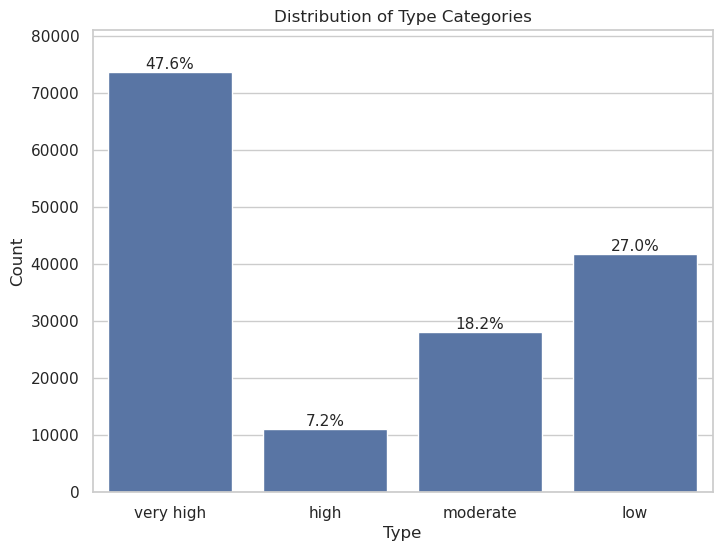

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set(style="whitegrid")

# Calculate counts and percentages
counts = collapsed_df['Type'].value_counts()
total = counts.sum()
percentages = (counts / total * 100).round(2)

# Desired order
type_order = ['very high', 'high', 'moderate', 'low']

# Plot
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=collapsed_df, x='Type', order=type_order)

# Annotate each bar
for p in ax.patches:
    height = p.get_height()
    label = p.get_x() + p.get_width() / 2
    category = p.get_x() + p.get_width() / 2
    type_name = p.get_x() + p.get_width() / 2
    percentage = (height / total) * 100
    ax.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=11)

# Labels
plt.title('Distribution of Type Categories')
plt.xlabel('Type')
plt.ylabel('Count')
plt.ylim(0, counts.max() * 1.1)  # Add some space above bars

plt.show()
